In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
cwd = os.getcwd()
dataset = pd.read_csv(os.path.join(cwd, 'datasets/train.csv'))

#### Feature description
---
* survival	- Survival	(0 = No, 1 = Yes)
* pclass    - Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
* sex       - Sex	
* Age	    - Age in years	
* sibsp	    - # of siblings / spouses aboard the Titanic	
* parch	    - # of parents / children aboard the Titanic	
* ticket	- Ticket number	
* fare	    - Passenger fare	
* cabin	    - Cabin number	
* embarked	-Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)


In [3]:
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
del dataset['PassengerId']

In [5]:
dataset.shape

(891, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
# seems to have null values in `Age`, `Cabin` and `Embark`

In [8]:
dataset.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [9]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age, Cabin and Embarked have missing values

In [10]:
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
columns = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Cabin', 'Embarked']

for column in columns:
    print('{}: {}'.format(column, dataset[column].unique()))

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36'

In [12]:
# survival rate
print('Survival rate: {:.2f}%'.format(len(dataset[dataset['Survived'] == 1]) / dataset.shape[0] *100))

Survival rate: 38.38%


<AxesSubplot:>

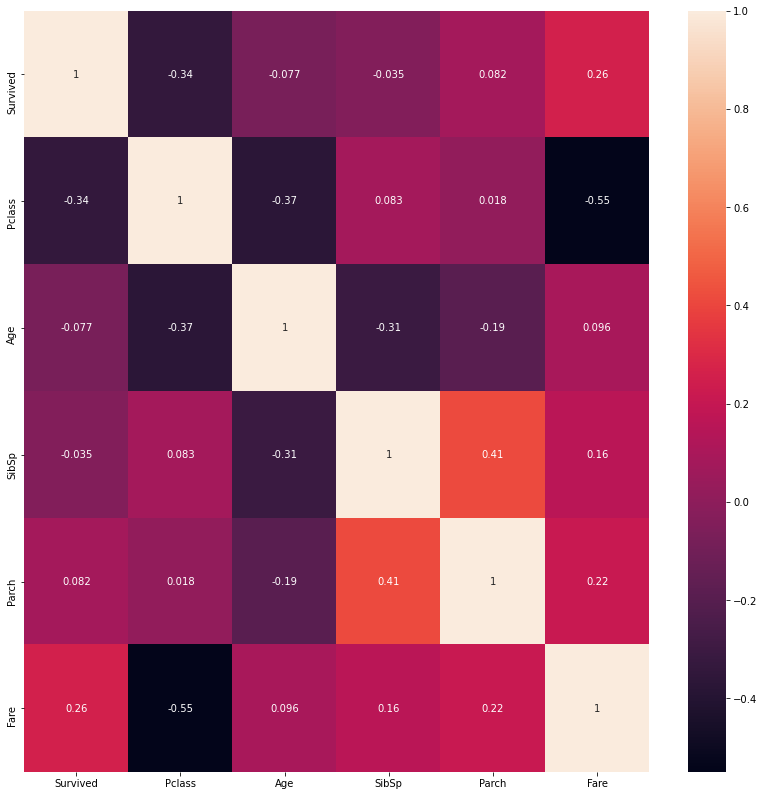

In [13]:
corr = dataset.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)

## Let's check about missing data

##### Let's see about the Cabin

Cabin missing count: 687


<AxesSubplot:>

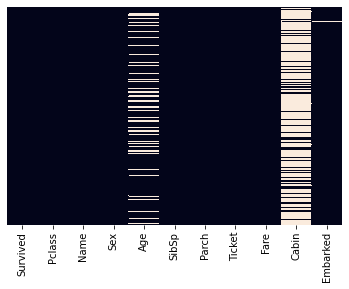

In [14]:
cabin_missing_count = dataset['Cabin'].isna().sum()

print('Cabin missing count: {}'.format(cabin_missing_count))
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

Most of the records got null values so the Cabin column can be droped

In [15]:
del dataset['Cabin']

##### Lets see about the Embarked

Dataset has 891 rows, 687 Cabin values are missing -> drop feature

In [16]:
embarked_missing_count = dataset['Embarked'].isna().sum()
print('Embarked missing count: {}'.format(embarked_missing_count))

Embarked missing count: 2


Only two records are missing. Let's see how the Embarked categories are distributed.

In [17]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Majority of the Embarked are S category

In [18]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].value_counts().idxmax())

##### Lest see about Age

Age missing record count: 177


<AxesSubplot:>

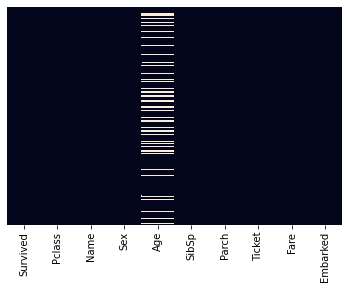

In [19]:
age_missing = dataset['Age'].isna().sum()

print('Age missing record count: {}'.format(age_missing))

sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

Missing age values cannot remove because other columns of 177 rows can contain valuble info. And age can be predicted by considering other features of the dataset so instead of using any basic imputation method. **Needs to further study**

In [20]:
corr = dataset.corr()

<AxesSubplot:>

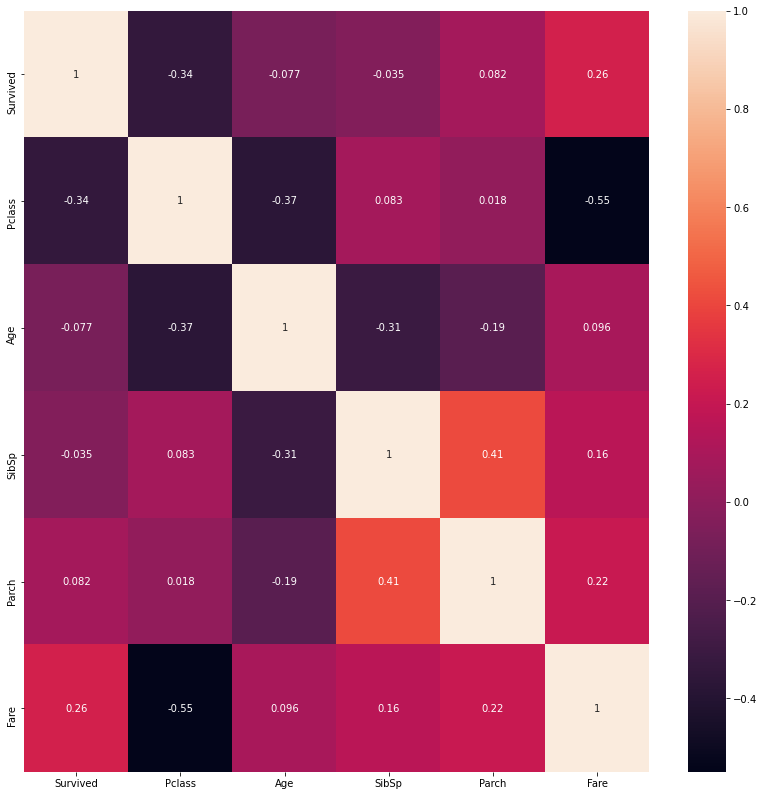

In [21]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)

Age missing survived: 52	 from age missing 29.38% survived
Age missing didn't survived: 125	 from age missing 70.62% didn't survived


Text(0.5, 0, 'Survived')

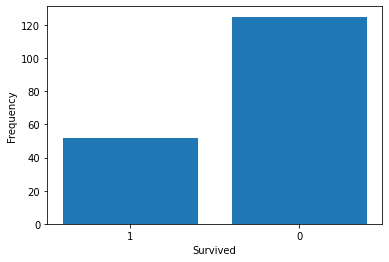

In [22]:
age_missing_survived = len(dataset[((dataset['Age'].isnull()) & (dataset['Survived'] == 1))])
age_missing_not_survived = len(dataset[((dataset['Age'].isnull()) & (dataset['Survived'] == 0))])

print('Age missing survived: {}\t from age missing {:.2f}% survived'.format(age_missing_survived, (age_missing_survived/age_missing)*100))
print("Age missing didn't survived: {}\t from age missing {:.2f}% didn't survived".format(age_missing_not_survived,  (age_missing_not_survived/age_missing)*100))

plt.bar(['1', '0'], [age_missing_survived, age_missing_not_survived])
plt.ylabel('Frequency')
plt.xlabel('Survived')

Most of the age missing did not survived. It's more than twice the size that survived

In [23]:
Let's

SyntaxError: EOL while scanning string literal (<ipython-input-23-7e46160ac81b>, line 1)